<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


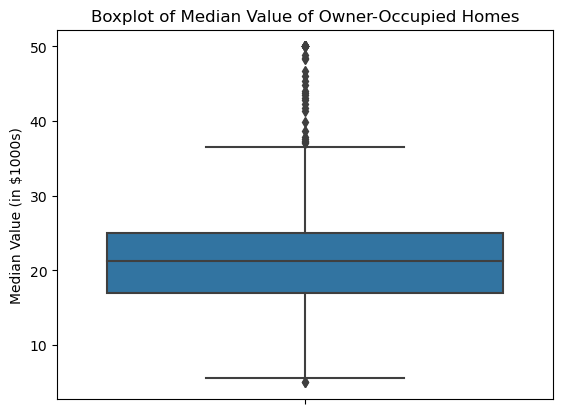

In [3]:
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

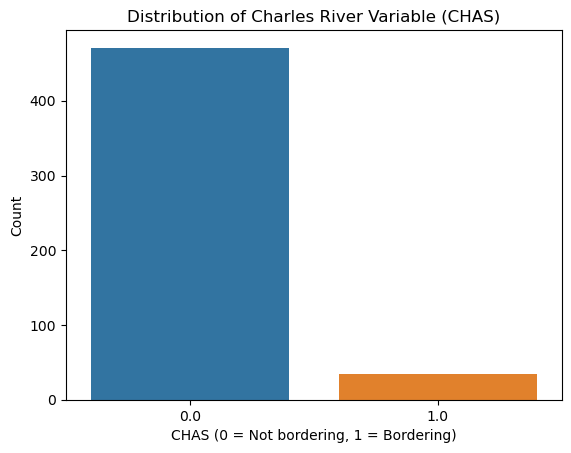

In [4]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Distribution of Charles River Variable (CHAS)')
pyplot.xlabel('CHAS (0 = Not bordering, 1 = Bordering)')
pyplot.ylabel('Count')
pyplot.show()

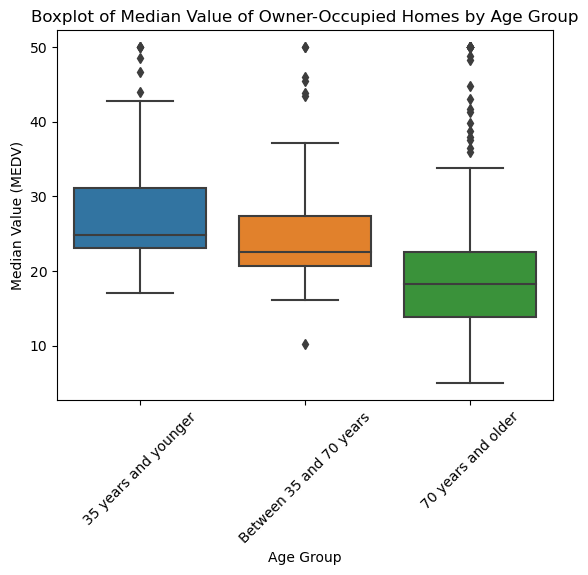

In [5]:
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (MEDV)')
pyplot.xticks(rotation=45)
pyplot.show()

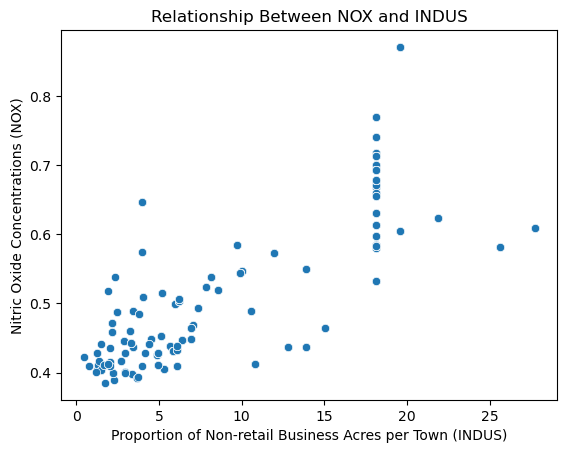

In [6]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship Between NOX and INDUS')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

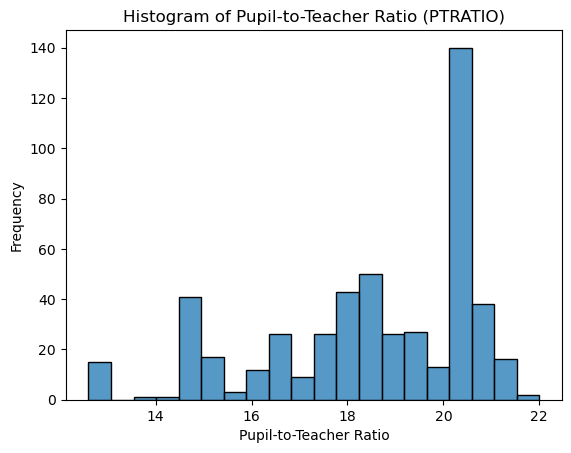

In [7]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [8]:
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

model = ols('MEDV ~ CHAS', data=boston_df).fit()

print(model.summary())

p_value = model.pvalues['CHAS']


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           7.39e-05
Time:                        13:04:15   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

In [9]:
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in the median value of houses based on their proximity to the Charles River (p < 0.05).")
else:
    print("Conclusion: There is no statistically significant difference in the median value of houses based on their proximity to the Charles River (p >= 0.05).")

Conclusion: There is a statistically significant difference in the median value of houses based on their proximity to the Charles River (p < 0.05).


In [10]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

p_value = anova_table['PR(>F)'].iloc[0]

                sum_sq     df          F    PR(>F)
CHAS       1312.079271    1.0  15.971512  0.000074
Residual  41404.216144  504.0        NaN       NaN


In [11]:
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in the median value of houses (MEDV) across the AGE groups (p < 0.05).")
else:
    print("Conclusion: There is no statistically significant difference in the median value of houses (MEDV) across the AGE groups (p >= 0.05).")


Conclusion: There is a statistically significant difference in the median value of houses (MEDV) across the AGE groups (p < 0.05).


In [12]:
from scipy.stats import pearsonr

r, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson correlation coefficient:", r)
print("p-value:", p_value)


Pearson correlation coefficient: 0.7636514469209149
p-value: 7.913361061240043e-98


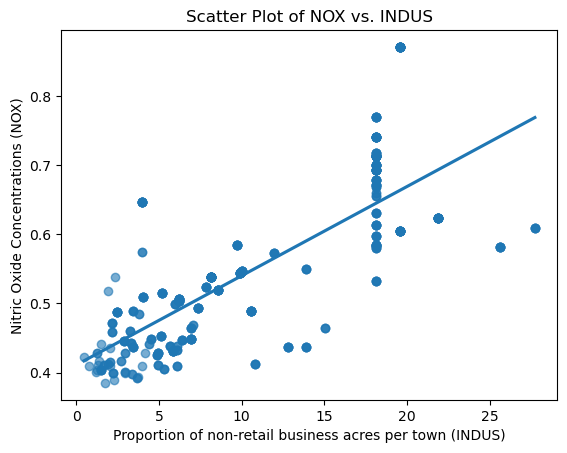

In [13]:
sns.regplot(x='INDUS', y='NOX', data=boston_df, ci=None, scatter_kws={'alpha':0.6})
pyplot.title("Scatter Plot of NOX vs. INDUS")
pyplot.xlabel("Proportion of non-retail business acres per town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")
pyplot.show()

In [14]:
if p_value < 0.05:
    print("Conclusion: There is a statistically significant relationship between NOX and INDUS (reject the null hypothesis).")
else:
    print("Conclusion: There is no statistically significant relationship between NOX and INDUS (fail to reject the null hypothesis).")


Conclusion: There is a statistically significant relationship between NOX and INDUS (reject the null hypothesis).


In [15]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        13:04:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

In [16]:
coef = model.params['DIS']
p_value = model.pvalues['DIS']

if p_value < 0.05:
    print(f"Conclusion: There is a statistically significant impact of weighted distance on MEDV. For every one-unit increase in DIS, the median value of owner-occupied homes changes by {coef:.2f} units (p = {p_value:.3f}).")
else:
    print(f"Conclusion: There is no statistically significant impact of weighted distance on MEDV (p = {p_value:.3f}).")


Conclusion: There is a statistically significant impact of weighted distance on MEDV. For every one-unit increase in DIS, the median value of owner-occupied homes changes by 1.09 units (p = 0.000).


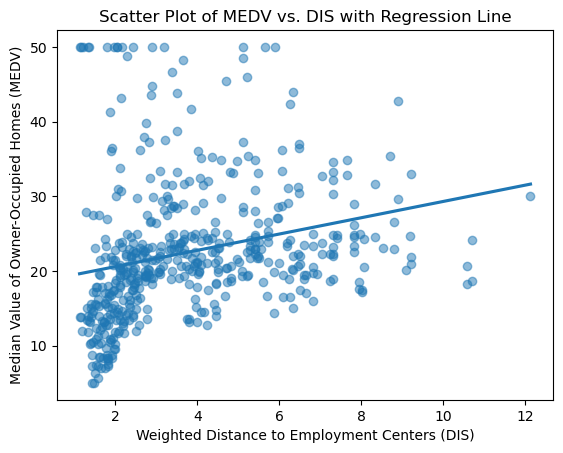

In [17]:
sns.regplot(x='DIS', y='MEDV', data=boston_df, ci=None, scatter_kws={'alpha': 0.5})
pyplot.title("Scatter Plot of MEDV vs. DIS with Regression Line")
pyplot.xlabel("Weighted Distance to Employment Centers (DIS)")
pyplot.ylabel("Median Value of Owner-Occupied Homes (MEDV)")
pyplot.show()